<a href="https://colab.research.google.com/github/HarshleenKaur95236/Model-trained-for-drought-prediction/blob/main/drought_harshleen_(Model_trained_and_shared_on_github)_16_May.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Command 1

In [ ]:
!unzip '/content/drive/MyDrive/Drought 28x28x4-20250511T104743Z-1-001.zip' -d ./data_drought

unzip:  cannot find or open /content/drive/MyDrive/Drought 28x28x4-20250511T104743Z-1-001.zip, /content/drive/MyDrive/Drought 28x28x4-20250511T104743Z-1-001.zip.zip or /content/drive/MyDrive/Drought 28x28x4-20250511T104743Z-1-001.zip.ZIP.


In [ ]:
# Unzip drought images correctly (flat into drought folder)
!unzip -n "/content/data_drought/Drought 28x28x4/drought/drought1.zip" -d "/content/data_drought/Drought 28x28x4/drought"
!unzip -n "/content/data_drought/Drought 28x28x4/drought/drought2.zip" -d "/content/data_drought/Drought 28x28x4/drought"

# Unzip non_drought images correctly (flat into non_drought folder)
!unzip -n "/content/data_drought/Drought 28x28x4/non_drought/non_drought1.zip" -d "/content/data_drought/Drought 28x28x4/non_drought"
!unzip -n "/content/data_drought/Drought 28x28x4/non_drought/non_drought2.zip" -d "/content/data_drought/Drought 28x28x4/non_drought"

Streaming output truncated to the last 5000 lines.
 extracting: /content/data_drought/Drought 28x28x4/non_drought/non_drought/image_4477_grass_land.png  
 extracting: /content/data_drought/Drought 28x28x4/non_drought/non_drought/image_2757_grass_land.png  
 extracting: /content/data_drought/Drought 28x28x4/non_drought/non_drought/image_10557_grass_land.png  
 extracting: /content/data_drought/Drought 28x28x4/non_drought/non_drought/image_12283_grass_land.png  
 extracting: /content/data_drought/Drought 28x28x4/non_drought/non_drought/image_49132_grass_land.png  
 extracting: /content/data_drought/Drought 28x28x4/non_drought/non_drought/image_815_grass_land.png  
 extracting: /content/data_drought/Drought 28x28x4/non_drought/non_drought/image_73629_grass_land.png  
 extracting: /content/data_drought/Drought 28x28x4/non_drought/non_drought/image_66303_grass_land.png  
 extracting: /content/data_drought/Drought 28x28x4/non_drought/non_drought/image_45022_grass_land.png  
 extracting: /con

In [ ]:
# code to move all images up
import shutil
import os

# Move images from drought/drought/ to drought/
drought_dir = '/content/data_drought/Drought 28x28x4/drought/drought'
target_drought_dir = '/content/data_drought/Drought 28x28x4/drought/'

if os.path.exists(drought_dir):
    for file in os.listdir(drought_dir):
        shutil.move(os.path.join(drought_dir, file), target_drought_dir)

    # Remove the extra nested folder after moving files
    os.rmdir(drought_dir)

# Move images from non_drought/non_drought/ to non_drought/
non_drought_dir = '/content/data_drought/Drought 28x28x4/non_drought/non_drought'
target_non_drought_dir = '/content/data_drought/Drought 28x28x4/non_drought/'

if os.path.exists(non_drought_dir):
    for file in os.listdir(non_drought_dir):
        shutil.move(os.path.join(non_drought_dir, file), target_non_drought_dir)

    # Remove the extra nested folder after moving files
    os.rmdir(non_drought_dir)

print("Fixed folder structure successfully.")

Fixed folder structure successfully.


In [ ]:
# verify no. of images
drought_images = os.listdir('/content/data_drought/Drought 28x28x4/drought')
non_drought_images = os.listdir('/content/data_drought/Drought 28x28x4/non_drought')

print(f"Drought images: {len(drought_images)}")
print(f"Non-Drought images: {len(non_drought_images)}")

Drought images: 36346
Non-Drought images: 40450


In [ ]:
!git clone https://github.com/wandb/droughtwatch.git
# Command 3

Cloning into 'droughtwatch'...
remote: Enumerating objects: 113, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 113 (delta 0), reused 0 (delta 0), pack-reused 110 (from 1)
Receiving objects: 100% (113/113), 7.52 MiB | 12.36 MiB/s, done.
Resolving deltas: 100% (55/55), done.


In [ ]:
# # Step 1: Imports and Setup
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras import layers, models
# import matplotlib.pyplot as plt
# import os

# Imports and setup
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# 1. Pretrained Model - VGG16 Transfer Learning
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

IMG_SHAPE = (128, 128, 3)

base_model = VGG16(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze initial layers

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1, activation='sigmoid')  # Binary Classification
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,715,201 (56.13 MB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# To Create train and val directory inside Drought 28*28*4
import os
import shutil

base_path = '/content/data_drought/Drought 28x28x4'

# Create new train & val folders
os.makedirs(f'{base_path}/train/drought', exist_ok=True)
os.makedirs(f'{base_path}/train/non_drought', exist_ok=True)
os.makedirs(f'{base_path}/val/drought', exist_ok=True)
os.makedirs(f'{base_path}/val/non_drought', exist_ok=True)

# Move drought images to train/drought
for file in os.listdir(f'{base_path}/drought'):
    src = os.path.join(f'{base_path}/drought', file)
    dst = os.path.join(f'{base_path}/train/drought', file)
    shutil.move(src, dst)

# Move non_drought images to train/non_drought
for file in os.listdir(f'{base_path}/non_drought'):
    src = os.path.join(f'{base_path}/non_drought', file)
    dst = os.path.join(f'{base_path}/train/non_drought', file)
    shutil.move(src, dst)

print("Images moved to train folder successfully.")

Images moved to train folder successfully.


In [ ]:
# To move 10% images form train to val folder
import os
import shutil
import random

def create_val_split(source_dir, val_dir, split_ratio=0.1):
    os.makedirs(val_dir, exist_ok=True)
    images = os.listdir(source_dir)
    val_count = int(len(images) * split_ratio)
    val_images = random.sample(images, val_count)

    for img in val_images:
        src = os.path.join(source_dir, img)
        dst = os.path.join(val_dir, img)
        shutil.move(src, dst)

# Paths
base_path = '/content/data_drought/Drought 28x28x4'
create_val_split(f'{base_path}/train/drought', f'{base_path}/val/drought')
create_val_split(f'{base_path}/train/non_drought', f'{base_path}/val/non_drought')

print("Validation split created successfully!")

Validation split created successfully!


In [ ]:
# 2. Data generators ( efficient Augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/content/data_drought/Drought 28x28x4/train'
val_dir = '/content/data_drought/Drought 28x28x4/val'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 69113 images belonging to 2 classes.
Found 7678 images belonging to 2 classes.


In [ ]:
# To check class distribution
import os

def count_images(path):
    drought_count = len(os.listdir(os.path.join(path, 'drought')))
    non_drought_count = len(os.listdir(os.path.join(path, 'non_drought')))
    print(f"Path: {path}")
    print(f"Drought: {drought_count}")
    print(f"Non-Drought: {non_drought_count}\n")

base_path = '/content/data_drought/Drought 28x28x4'
count_images(f'{base_path}/train')
count_images(f'{base_path}/val')

Path: /content/data_drought/Drought 28x28x4/train
Drought: 32712
Non-Drought: 36405

Path: /content/data_drought/Drought 28x28x4/val
Drought: 3634
Non-Drought: 4045



In [ ]:
# 3. Compute Class Weights(For imbalance problem)
from sklearn.utils import class_weight
import numpy as np

# Example counts (replace with actual values)
train_drought = 36000  # drought images in train
train_non_drought = 40000  # non-drought images in train

y_train_labels = [0]*train_non_drought + [1]*train_drought
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_labels), y=y_train_labels)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

print("Class Weights:", class_weights_dict)


# from sklearn.utils.class_weight import compute_class_weight
# import numpy as np

# labels = train_generator.classes
# class_weights = compute_class_weight('balanced', classes=np.unique(labels), y=labels)
# class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}
# print("Class Weights:", class_weights_dict)

Class Weights: {0: np.float64(0.95), 1: np.float64(1.0555555555555556)}


In [ ]:
# Model definition
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
base_model.trainable = False  # Freeze base layers

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.summary()

<ipython-input-13-095088da5c78>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 4. Model Training
class_weights = {0: 0.95, 1: 1.05}

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    class_weight=class_weights
)

Epoch 1/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 199s 76ms/step - accuracy: 0.7280 - loss: 0.5687 - val_accuracy: 0.7364 - val_loss: 0.5626
Epoch 2/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 149s 69ms/step - accuracy: 0.7305 - loss: 0.5651 - val_accuracy: 0.7365 - val_loss: 0.5616
Epoch 3/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 148s 69ms/step - accuracy: 0.7362 - loss: 0.5563 - val_accuracy: 0.7382 - val_loss: 0.5554
Epoch 4/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 150s 70ms/step - accuracy: 0.7384 - loss: 0.5530 - val_accuracy: 0.7374 - val_loss: 0.5511
Epoch 5/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 153s 71ms/step - accuracy: 0.7418 - loss: 0.5529 - val_accuracy: 0.7407 - val_loss: 0.5486
Epoch 6/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 150s 69ms/step - accuracy: 0.7396 - loss: 0.5505 - val_accuracy: 0.7383 - val_loss: 0.5512
Epoch 7/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 149s 69ms/step - accuracy: 0.7410 - loss: 0.5494 - val_accuracy: 0.7469 - val_loss: 0.5459
Epoch 8/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 149s 69ms/step - accuracy: 

In [ ]:
# 5. Fine-Tune Top Layers
base_model.trainable = True  # Unfreeze for fine-tuning

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

fine_tune_epochs = 20

history_fine = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=fine_tune_epochs
)

Epoch 1/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 211s 78ms/step - accuracy: 0.7540 - loss: 0.5370 - val_accuracy: 0.7581 - val_loss: 0.5304
Epoch 2/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 166s 69ms/step - accuracy: 0.7515 - loss: 0.5373 - val_accuracy: 0.7546 - val_loss: 0.5334
Epoch 3/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 150s 69ms/step - accuracy: 0.7536 - loss: 0.5380 - val_accuracy: 0.7591 - val_loss: 0.5306
Epoch 4/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 149s 69ms/step - accuracy: 0.7587 - loss: 0.5331 - val_accuracy: 0.7619 - val_loss: 0.5310
Epoch 5/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 149s 69ms/step - accuracy: 0.7578 - loss: 0.5337 - val_accuracy: 0.7597 - val_loss: 0.5299
Epoch 6/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 149s 69ms/step - accuracy: 0.7551 - loss: 0.5375 - val_accuracy: 0.7594 - val_loss: 0.5291
Epoch 7/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 150s 69ms/step - accuracy: 0.7566 - loss: 0.5320 - val_accuracy: 0.7571 - val_loss: 0.5314
Epoch 8/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 150s 70ms/step - accuracy: 

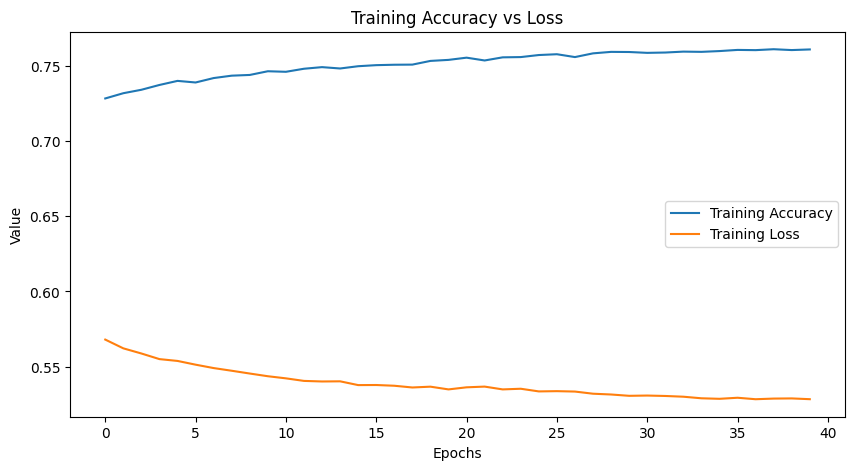

In [ ]:
# 6. Plot Accuracy vs Loss
import matplotlib.pyplot as plt

acc = history.history['accuracy'] + history_fine.history['accuracy']
loss = history.history['loss'] + history_fine.history['loss']

epochs_range = range(len(acc))

plt.figure(figsize=(10, 5))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Training Accuracy vs Loss')
plt.legend()
plt.show()

In [ ]:
# Save model
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/saved_models/drought_model_mobilenetv22.h5')
print("Model Saved Successfully!")
# /content/drive/MyDrive

In [ ]:
# To test trained model
# Load and preproces images
from tensorflow.keras.preprocessing import image
import numpy as np

# Path to your drought image
# img_path = '/content/data_drought/Drought 28x28x4/train/drought/image_0_barren_land.png'    #Non - Drought
img_path = '/content/data_drought/Drought 28x28x4/train/drought/image_10001_barren_land.png'   #Non - Drought


# Load the image
img = image.load_img(img_path, target_size=(64, 64))

# Convert image to array
img_array = image.img_to_array(img)

# Normalize (rescale)
img_array = img_array / 255.0

# Expand dims to match model input shape (batch_size, height, width, channels)
img_array = np.expand_dims(img_array, axis=0)

In [ ]:
# Predict Model
# Get prediction
prediction = model.predict(img_array)

# Since sigmoid is used, prediction will be between 0 and 1
print(f"Prediction score: {prediction[0][0]}")

# Threshold to classify (adjust 0.5 if needed)
if prediction[0][0] > 0.5:
    print("Predicted Class: Drought")
else:
    print("Predicted Class: Non-Drought")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediction score: 0.2136794626712799
Predicted Class: Non-Drought


In [ ]:
# To predict for val_generator
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Step 1: Predict on validation data
val_steps = val_generator.samples // val_generator.batch_size + 1  # Total steps to cover all images
pred_probs = model.predict(val_generator, steps=val_steps, verbose=1)

# Step 2: Convert probabilities to class labels (threshold 0.5)
y_pred = (pred_probs > 0.5).astype(int).flatten()

# Step 3: True labels from generator
y_true = val_generator.classes

# Step 4: Print evaluation metrics
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))

# Step 5: Detailed classification report
print("\nClassification Report:\n", classification_report(y_true, y_pred))

# Step 6: Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))

240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step
Accuracy: 0.4989580619953113
Precision: 0.524980978950038
Recall: 0.5118694362017804
F1 Score: 0.5183423062476524

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.48      0.48      3634
           1       0.52      0.51      0.52      4044

    accuracy                           0.50      7678
   macro avg       0.50      0.50      0.50      7678
weighted avg       0.50      0.50      0.50      7678


Confusion Matrix:
 [[1761 1873]
 [1974 2070]]


In [ ]:
!pip install wandb
# Command 4

In [ ]:
!export CUDA_VISIBLE_DEVICES=0
# Command 5

In [ ]:
!export PATH=~/.local/bin:$PATH
# Command 6

a8b8f04c4b9cf39ff8d0aee33339022f12e5e716

In [ ]:
!wandb init
# Command 7

Let's setup this directory for W&B!
wandb: WARNING Using legacy-service, which is deprecated. If this is unintentional, you can fix it by ensuring you do not call `wandb.require('legacy-service')` and do not set the WANDB_X_REQUIRE_LEGACY_SERVICE environment variable.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: kaurharshleen052 (kaurharshleen052-guru-nanak-dev-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: WARNING Using legacy-service, which is deprecated. If this is unintentional, you can fix it by ensuring you do not call `wandb.require('legacy-service')` and do not set

In [ ]:
!ls
# Command 8

data_drought		       drought_model_mobilenetv22.h5  wandb
drive			       drought_model_mobilenetv2.h5
drought_model_mobilenetv21.h5  sample_data


In [ ]:
!python train.py --epochs 1
# Command 9

python3: can't open file '/content/train.py': [Errno 2] No such file or directory


Replace VGG16 with mobilenet for better accuracy  17 May 2025

In [ ]:
# Unfreeze more layers:
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False

In [ ]:
# Learning Rate Scheduling:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=1000,
    decay_rate=0.9)

In [ ]:
# Add Dropout:
model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid', dtype='float32')
])

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [ ]:
# 1. Import mobilenetV2 and define model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

IMG_SHAPE = (64, 64, 3)

# Load MobileNetV2 as base model
base_model = MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base model

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

<ipython-input-34-2667a0d29420>:9: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')


In [ ]:
# Unfreeze more layers:
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False

In [ ]:
# Learning Rate Scheduling:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=1000,
    decay_rate=0.9)

In [ ]:
# Add Dropout:
model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid', dtype='float32')
])

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [ ]:
# To Create train and val directory inside Drought 28*28*4
import os
import shutil

base_path = '/content/data_drought/Drought 28x28x4'

# Create new train & val folders
os.makedirs(f'{base_path}/train/drought', exist_ok=True)
os.makedirs(f'{base_path}/train/non_drought', exist_ok=True)
os.makedirs(f'{base_path}/val/drought', exist_ok=True)
os.makedirs(f'{base_path}/val/non_drought', exist_ok=True)

# Move drought images to train/drought
for file in os.listdir(f'{base_path}/drought'):
    src = os.path.join(f'{base_path}/drought', file)
    dst = os.path.join(f'{base_path}/train/drought', file)
    shutil.move(src, dst)

# Move non_drought images to train/non_drought
for file in os.listdir(f'{base_path}/non_drought'):
    src = os.path.join(f'{base_path}/non_drought', file)
    dst = os.path.join(f'{base_path}/train/non_drought', file)
    shutil.move(src, dst)

print("Images moved to train folder successfully.")

Images moved to train folder successfully.


In [ ]:
# To move 10% images form train to val folder
import os
import shutil
import random

def create_val_split(source_dir, val_dir, split_ratio=0.1):
    os.makedirs(val_dir, exist_ok=True)
    images = os.listdir(source_dir)
    val_count = int(len(images) * split_ratio)
    val_images = random.sample(images, val_count)

    for img in val_images:
        src = os.path.join(source_dir, img)
        dst = os.path.join(val_dir, img)
        shutil.move(src, dst)

# Paths
base_path = '/content/data_drought/Drought 28x28x4'
create_val_split(f'{base_path}/train/drought', f'{base_path}/val/drought')
create_val_split(f'{base_path}/train/non_drought', f'{base_path}/val/non_drought')

print("Validation split created successfully!")

Validation split created successfully!


In [ ]:
# Step 1: Import & Mixed Precision (Faster)
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import mixed_precision

# Enable mixed precision for speedup
mixed_precision.set_global_policy('mixed_float16')

In [ ]:
# Step 2: Data Generators with Augmentation

train_dir = '/content/data_drought/Drought 28x28x4/train'
val_dir = '/content/data_drought/Drought 28x28x4/val'

IMG_SIZE = (64, 64)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   zoom_range=0.2)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=IMG_SIZE,
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='binary')

val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=IMG_SIZE,
                                                batch_size=BATCH_SIZE,
                                                class_mode='binary')

Found 55984 images belonging to 2 classes.
Found 20807 images belonging to 2 classes.


In [ ]:
#  Step 3: Load MobileNetV2 Base Model
# base_model = tf.keras.applications.MobileNetV2(input_shape=(96, 96, 3),
#                                                include_top=False,
#                                                weights='imagenet')

# base_model.trainable = False  # Freeze pre-trained layers

#  Step 3: Load MobileNetV2 Base Model with alpha=0.35
base_model = tf.keras.applications.MobileNetV2(input_shape=(96, 96, 3),
                                               alpha=0.35,
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
# # Step 3: Load EfficientNetB0   ---  just to check accuracy
# # base_model.trainable = False  # Freeze pre-trained layers
# base_model = tf.keras.applications.EfficientNetB0(input_shape=(96, 96, 3),
#                                                alpha=0.35,
#                                                include_top=False,
#                                                weights='imagenet')

In [ ]:
# Step 4: Build the Full Model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid', dtype='float32')  # force float32 output
])

In [ ]:
# Step 5: Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# # Step 6: Train the Model with Class Weights
# class_weights = {0: 0.95, 1: 1.05}

# history = model.fit(train_generator,
#                     validation_data=val_generator,
#                     epochs=10,
#                     class_weight=class_weights)

Epoch 1/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 261s 109ms/step - accuracy: 0.7119 - loss: 0.5897 - val_accuracy: 0.7411 - val_loss: 0.5651
Epoch 2/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 228s 106ms/step - accuracy: 0.7380 - loss: 0.5581 - val_accuracy: 0.7462 - val_loss: 0.5488
Epoch 3/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 261s 105ms/step - accuracy: 0.7430 - loss: 0.5484 - val_accuracy: 0.7477 - val_loss: 0.5472
Epoch 4/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 225s 104ms/step - accuracy: 0.7455 - loss: 0.5458 - val_accuracy: 0.7576 - val_loss: 0.5343
Epoch 5/20
1140/2160 ━━━━━━━━━━━━━━━━━━━━ 1:42 100ms/step - accuracy: 0.7474 - loss: 0.5440

In [ ]:
# Step 6: Train the Model with Class Weights  // FOR 20 EPOCHS   - its taking almost 48min per epoch and that's not good
class_weights = {0: 0.95, 1: 1.05}

history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=20,
                    class_weight=class_weights)

Epoch 1/20


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

In [ ]:
# 3. Finetune mobilenet for better accuracy
# Unfreeze some top layers
base_model.trainable = True

# fine-tune last few layers only
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Re-compile with lower learning rate
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fine-tune model
history_fine = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10  # Can increase if accuracy improves
)

Epoch 1/10
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 258s 108ms/step - accuracy: 0.6666 - loss: 0.6416 - val_accuracy: 0.6868 - val_loss: 0.6143
Epoch 2/10
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 213s 99ms/step - accuracy: 0.7024 - loss: 0.5984 - val_accuracy: 0.6899 - val_loss: 0.6015
Epoch 3/10
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 215s 99ms/step - accuracy: 0.7131 - loss: 0.5859 - val_accuracy: 0.7095 - val_loss: 0.5846
Epoch 4/10
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 213s 99ms/step - accuracy: 0.7188 - loss: 0.5800 - val_accuracy: 0.7129 - val_loss: 0.5830
Epoch 5/10
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 212s 98ms/step - accuracy: 0.7252 - loss: 0.5746 - val_accuracy: 0.7160 - val_loss: 0.5805
Epoch 6/10
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 215s 100ms/step - accuracy: 0.7284 - loss: 0.5693 - val_accuracy: 0.7245 - val_loss: 0.5735
Epoch 7/10
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 259s 98ms/step - accuracy: 0.7307 - loss: 0.5636 - val_accuracy: 0.7262 - val_loss: 0.5669
Epoch 8/10
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 265s 100ms/step - accurac

In [ ]:
# Step 7: Plot Accuracy & Loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()


In [ ]:
# 5. Save the model
model.save('/content/drought_model_mobilenetv16 may 2025.h5')

Checking the code after this

In [ ]:
#  Step 3: Load MobileNetV2 Base Model with alpha=0.35
base_model = tf.keras.applications.MobileNetV2(input_shape=(96, 96, 3),
                                               alpha=0.35,
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(96, 96),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True,
    seed=42
)

Found 55984 images belonging to 2 classes.


In [ ]:
steps_per_epoch=100

In [ ]:
# Step 4: Build the Full Model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid', dtype='float32')  # force float32 output
])

In [ ]:
# Step 5: Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Step 6: Train the Model with Class Weights  // FOR 20 EPOCHS   - its taking almost 8min per epoch and that's not good
class_weights = {0: 0.95, 1: 1.05}

history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=20,
                    class_weight=class_weights)

Epoch 1/20
   4/1750 ━━━━━━━━━━━━━━━━━━━━ 2:25:24 5s/step - accuracy: 0.5150 - loss: 0.7486

KeyboardInterrupt: 

Using a lighter model 20 May 2025

In [ ]:
# Step 3: Load EfficientNetB0   ---  just to check accuracy
# base_model.trainable = False  # Freeze pre-trained layers
base_model = tf.keras.applications.EfficientNetB0(input_shape=(96, 96, 3),
                                               alpha=0.35,
                                               include_top=False,
                                               weights='imagenet')

TypeError: EfficientNetB0() got an unexpected keyword argument 'alpha'

In [ ]:
# Data Generaotors with Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/data_drought/Drought 28x28x4/train"
val_dir = "/content/data_drought/Drought 28x28x4/val"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 62203 images belonging to 2 classes.
Found 14588 images belonging to 2 classes.


In [ ]:
# Load MobileNetV2 Base Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

base_model = MobileNetV2(input_shape=(64, 64, 3),
                         include_top=False,
                         weights='imagenet',
                         alpha=0.35)  # lightweight model

base_model.trainable = False  # Freeze base for initial training

<ipython-input-41-87e7b2351b72>:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(64, 64, 3),


2019640/2019640 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

In [ ]:
# Add Dropout:
model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid', dtype='float32')
])

In [ ]:
class_weights = {0: 0.95, 1: 1.05}

In [ ]:
# early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_0.35_224            │ (None, 2, 2, 1280)     │       410,208 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_9      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,489 (1.57 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 410,208 (1.56 MB)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10  # You can increase once performance improves
)

Epoch 1/10
1944/1944 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.6508 - loss: 0.6468

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1944/1944 ━━━━━━━━━━━━━━━━━━━━ 751s 381ms/step - accuracy: 0.6508 - loss: 0.6468 - val_accuracy: 0.6714 - val_loss: 0.6245
Epoch 2/10
1944/1944 ━━━━━━━━━━━━━━━━━━━━ 710s 365ms/step - accuracy: 0.6764 - loss: 0.6145 - val_accuracy: 0.6680 - val_loss: 0.6262
Epoch 3/10
1944/1944 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 0.6788 - loss: 0.6156

KeyboardInterrupt: 

In [ ]:
# Plot accuracy and loss
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()

Model Training usimg ResNet50 21 May 2025

In [ ]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

In [ ]:
# 1. Import Libraries
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
# from tensorflow.keras.optimizers import Adam
# import matplotlib.pyplot as plt

# 1. Import Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import os

In [ ]:
# # 2. Image Generators with Augmentation
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     zoom_range=0.2,
#     horizontal_flip=True
# )
# val_datagen = ImageDataGenerator(rescale=1./255)

# 2. Mixed Precision for Faster Training (if GPU supports it)
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

In [ ]:
# # 3. Define Paths and Flow from Directory
# train_dir = '/content/data_drought/Drought 28x28x4/train'
# val_dir = '/content/data_drought/Drought 28x28x4/val'

# IMG_SIZE = (64, 64)
# BATCH_SIZE = 32

# train_generator = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=IMG_SIZE,
#     batch_size=BATCH_SIZE,
#     class_mode='binary'
# )

# val_generator = val_datagen.flow_from_directory(
#     val_dir,
#     target_size=IMG_SIZE,
#     batch_size=BATCH_SIZE,
#     class_mode='binary'
# )

# 3. Image Generators with Lighter Augmentations
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.1,
    shear_range=0.1
)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# # 4. Define Class Weights (adjust based on your counts)
# class_weights = {
#     0: 0.95,  # class 'drought'
#     1: 1.05   # class 'non_drought'
# }

# 4. Directory Paths
train_dir = '/content/data_drought/Drought 28x28x4/train'
val_dir = '/content/data_drought/Drought 28x28x4/val'

IMG_SIZE = (32, 32)
BATCH_SIZE = 32

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 55984 images belonging to 2 classes.
Found 20807 images belonging to 2 classes.


In [ ]:
# # 5. Build ResNet50 Model
# base_model = ResNet50(include_top=False, input_shape=(64, 64, 3), weights='imagenet')
# base_model.trainable = False  # Freeze base initially

# model = Sequential([
#     base_model,
#     GlobalAveragePooling2D(),
#     Dropout(0.3),
#     Dense(1, activation='sigmoid')  # Binary classification
# ])

# model.compile(
#     optimizer=Adam(learning_rate=0.0001),
#     loss='binary_crossentropy',
#     metrics=['accuracy']
# )

# model.summary()

# 5. Class Weights (update if needed)
class_weights = {0: 0.95, 1: 1.05}

In [ ]:
# # 6. Train Model (Initial)
# initial_epochs = 10
# history = model.fit(
#     train_generator,
#     validation_data=val_generator,
#     epochs=initial_epochs,
#     class_weight=class_weights
# )

# 6. ResNet50 Model (Freeze more layers)
base_model = ResNet50(include_top=False, input_shape=(32, 32, 3), weights='imagenet')
for layer in base_model.layers[:140]:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid', dtype='float32')  # Output in float32 for compatibility
])

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 1, 1, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_11     │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,850,113 (90.98 MB)

 Trainable params: 15,240,449 (58.14 MB)

 Non-trainable params: 8,609,664 (32.84 MB)

In [ ]:
# # 7. Fine-tune from deeper layers
# base_model.trainable = True

# fine_tune_at = 100  # freeze first 100 layers
# for layer in base_model.layers[:fine_tune_at]:
#     layer.trainable = False

# model.compile(
#     optimizer=Adam(learning_rate=0.00001),  # Lower LR
#     loss='binary_crossentropy',
#     metrics=['accuracy']
# )

# fine_tune_epochs = 10
# total_epochs = initial_epochs + fine_tune_epochs

# history_fine = model.fit(
#     train_generator,
#     validation_data=val_generator,
#     epochs=total_epochs,
#     initial_epoch=history.epoch[-1],
#     class_weight=class_weights
# )

# 7. Callbacks to stop early and save best model
callbacks = [
    EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True),
    ModelCheckpoint('resnet_best_model.h5', monitor='val_accuracy', save_best_only=True)
]

In [ ]:
# # 8. Plot Accuracy and Loss
# acc = history.history['accuracy'] + history_fine.history['accuracy']
# val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
# loss = history.history['loss'] + history_fine.history['loss']
# val_loss = history.history['val_loss'] + history_fine.history['val_loss']

# plt.figure(figsize=(12,5))
# plt.subplot(1,2,1)
# plt.plot(acc, label='Train Accuracy')
# plt.plot(val_acc, label='Val Accuracy')
# plt.title('Accuracy')
# plt.legend()

# plt.subplot(1,2,2)
# plt.plot(loss, label='Train Loss')
# plt.plot(val_loss, label='Val Loss')
# plt.title('Loss')
# plt.legend()
# plt.show()

# 8. Training
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    class_weight=class_weights,
    callbacks=callbacks
)

Epoch 1/20
   2/1750 ━━━━━━━━━━━━━━━━━━━━ 3:23:03 7s/step - accuracy: 0.5000 - loss: 0.9904  

KeyboardInterrupt: 

In [ ]:
# 9. Plot Accuracy and Loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()